# Packages and functions

In [1]:
#Tables and matrices
import numpy as np
import pandas as pd

#Stats
import scipy.stats as st
from scipy.optimize import fmin
from scipy import integrate
from scipy.stats.mstats import mquantiles
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from statsmodels.stats.diagnostic import het_breuschpagan #Heteroskedasticity test
from statsmodels.stats.diagnostic import het_white #Heteroskedasticity test
from sklearn.metrics import confusion_matrix, normalized_mutual_info_score, silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA ,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


#Probabilistic programs
import pymc as pm
import pytensor.tensor as pt
print('Running on PyMC v{}'.format(pm.__version__))


#Graphs 
#IMPORTANT: properly install ipywidgets and nodejs for interactive graphs
#If you are in jupyterlab, activate the widget extension (it should be in the latest versions)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from matplotlib import animation, rc
from IPython.display import display, HTML, Markdown
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, HBox, VBox, Layout
from mpl_toolkits.mplot3d import axes3d
import arviz as az



WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.16.1


In [2]:
def silhouette_viz (X, range_n_clusters):
    #Source of function: https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    
    #range_n_clusters = [2, 3, 4, 5, 6]
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
    
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )
    
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )
    
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
    
        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )
    
    plt.show()


def normalized_mutual_info_viz(X, y_true, n_clusters_range):
    
    # Store NMI scores for each number of clusters
    nmi_scores = []
    
    # Iterate over different numbers of clusters
    for n_clusters in n_clusters_range:
        # Create K-Means model
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
        # Fit the model to the data
        kmeans.fit(X)
    
        # Predict cluster labels
        y_pred = kmeans.predict(X)
    
        # Calculate NMI score
        nmi = normalized_mutual_info_score(y_true, y_pred)
        nmi_scores.append(nmi)
    
    # Plot NMI scores
    plt.plot(n_clusters_range, nmi_scores)
    plt.xticks(n_clusters_range)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Normalized Mutual Information")
    plt.title("NMI vs. Number of Clusters")
    plt.show()

# KNN: k-means clustering
* VanderPlas, J. (2022). Python data science handbook: Essential tools for working with data. O'Reilly Media, Inc. 

This is an unsupervised learning technique (not 100%, we still define the number of clusters).

We can cluster around n dimensions (but beware curse of dimensionality). For instance, cluster customers around income, years of education, and amount of debt.

An optimal cluster has:
* The cluster center is the arithmetic mean of all the points belonging to the cluster.
* Each point is closer to its own cluster center than to other cluster centers.

Some drawbacks with this definition:
* Hard to interpret if the clusters have complicated geometries

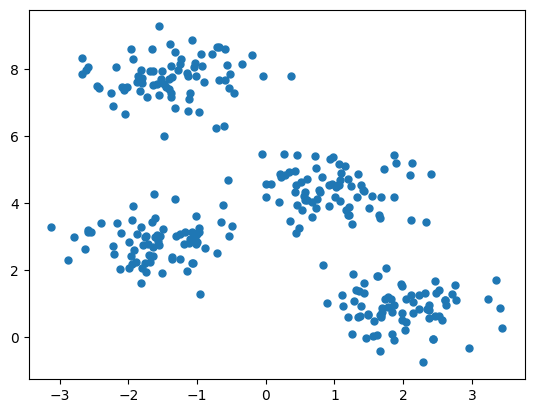

In [3]:
#Generated synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0) #y_true is the actual category
plt.scatter(X[:, 0], X[:, 1], s=25);

In [4]:
X.shape

(300, 2)

In [5]:
kmeans = KMeans(n_clusters=4) #we have to tell it the number of clusters
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

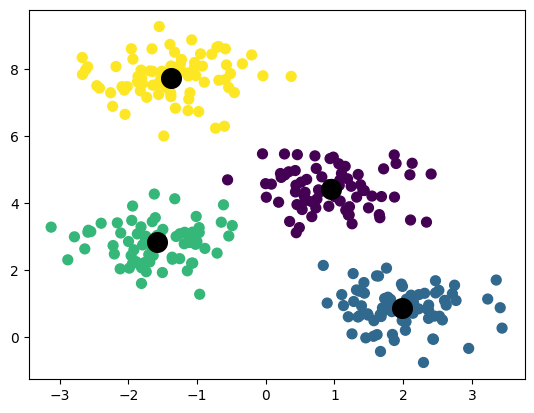

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_   
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);

The idea is to interpret those clusters. Let's imagine that the previous graph the variable are customer acquisition cost and age.

(15.0, 65.0)

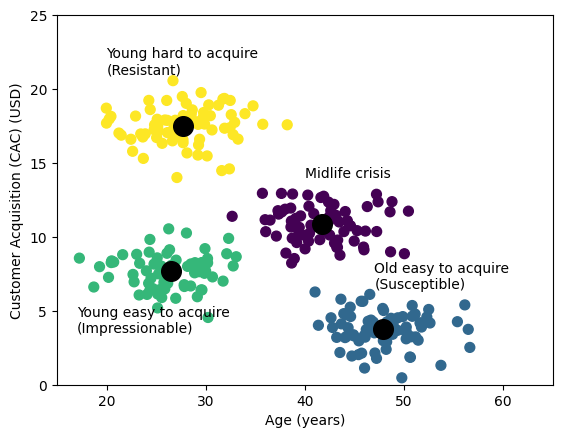

In [7]:
x = (X[:, 0]+6)*6
x_c = (centers[:, 0]+6)*6
y = 2*(X[:, 1] + 1)
y_c = 2*(centers[:, 1]+1)
plt.scatter(x, y, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_   
plt.scatter(x_c, y_c, c='black', s=200);
plt.xlabel("Age (years)")
plt.ylabel("Customer Acquisition (CAC) (USD)")
plt.text(20, 21, "Young hard to acquire\n(Resistant)")
plt.text(17, 3.5, "Young easy to acquire\n(Impressionable)")
plt.text(40, 14, "Midlife crisis")
plt.text(47, 6.5, "Old easy to acquire\n(Susceptible)")
plt.ylim(0,25)
plt.xlim(15,65)

Are the clusters good? There are two general ways of thinking about this problem:

1) **You do not know the actual clusters, the ground truth**, use internal evaluation metrics. For instance, Silhouette Coefficient: Measures how similar a data point is to its own cluster compared to other clusters. A higher coefficient indicates better-quality clusters.

2) **You know the actual clusters, the ground truth**, use external evaluation metrics. For instance, normalized mutual information: Measures the mutual information between the clustering results and the ground truth. A higher value indicates better agreement.

Let's calculate internal evaluation metrics with silhouette analysis with sklearn. 

Sklearn calculates this: "Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster."

Thus, we want them as clase as possible to +1.

In [ ]:
range_n_clusters = [2,3,4,5,6] #the potential number of clusters
print("In the following plots, the red dashed line is the average silhouette score. The histograms are the scores for each observation. \nWe do not want too many observations below average i.e. to the left of the dashed line.\nFour clusters look the best.\n")
silhouette_viz (X, range_n_clusters) 

In this example, we know the ground truth (we asked make_blobs for 4 clusters). 

Let's calculate, external evaluation metrics with normalized mutual information. Perfect labeling is scored 1.0. Chance labeling is 0.

In [ ]:
print("Again, the optimal number of clusters is four. This is expected in this pedagogical example (we asked make_blobs for four clusters)")
range_n_clusters = list(range(2, 21)) #n clusters to evaluate
normalized_mutual_info_viz(X, y_true, range_n_clusters)

Now let's apply k-means clustering to the bank data. We do not know the ground truth, so we will evaluate with internal metrics (e.g. silhouette metric).

In [15]:
 #load data
data_bank = pd.read_csv("bank-additional-full.csv", sep = ",")
data_bank.columns = data_bank.columns.str.replace(".", "_") #avoid dots in python
data_bank_dictionary = {"******** CLIENT DATA ********": 
                        {"age": "years", "job": "type of job", "marital": "marital status", "education": "education", 
                         "default": "has credit default?", "housing":"has housing loan", "loan":"has personal loan?"},
                       "******** LAST CONTACT CURRENT CAMPAIGN ********": 
                        {"contact": "contact communication type", "month": "last contact month of year",
                        "day_of_week": "last contact day of the week", 
                         "duration": "last contact duration, in seconds. Important note: this attribute affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model"},
                       "******** OTHER ********": 
                        {"campaign": "number of contacts performed during this campaign and for this client",
                        "pdays": "days that passed by after last contact from a previous campaign (999 means not previously contacted)",
                        "previous": "number of contacts performed before this campaign and for this client",
                        "poutcome": "outcome of the previous marketing campaign"},
                       "******** SOCIOECONOMIC ********": 
                        {"emp.var.rate": "employment variation rate - quarterly indicator",
                        "cons.price.idx": "consumer price index - monthly indicator",
                        "cons.conf.idx": "consumer confidence index - monthly indicator",
                        "euribor3m": "euribor 3 month rate - daily indicator",
                        "nr.employed": "number of employees - quarterly indicator"},
                       "******** DEPENDENT/ENDOGENOUS VARIABLE ********": 
                        {"y": "has the client subscribed a term deposit?"}}
data_bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                  object
dtype: object

Let's start simple, two clustering variables

In [ ]:
X = np.array(data_bank.loc[:, ["emp_var_rate", "cons_conf_idx"]])

In [ ]:
kmeans = KMeans(n_clusters = 2, random_state=0) #we have to define the number of clusters
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s=25, cmap='viridis')
centers = kmeans.cluster_centers_   
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200);
plt.text(centers[0, 0] + 0.1, centers[0, 1], "Bullish")
plt.text(centers[1, 0] + 0.1, centers[1, 1], "Bearish")
plt.xlabel("Employment Variation Rate")
plt.ylabel("Consumer Confidence Index")
plt.title("Macroeconomic Clusters");


How good are two clusters? Let's evaluate more clusters with internal metrics, namely, with the silhouette metric.

In [ ]:
range_n_clusters = [2,3,4,5] #the potential number of clusters
print("In the following plots, the red dashed line is the average silhouette score. The histograms are the scores for each observation. \nWe do not want too many observations below average i.e. to the left of the dashed line.\nThree clusters look the best.\n")
silhouette_viz (X, range_n_clusters) 

Three clusters look the best from the silohouette analyses. The remaining options of n clusters have full clusters below average.

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=0) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s=25, cmap='viridis')
centers = kmeans.cluster_centers_   
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200);
plt.text(centers[0, 0] + 0.1, centers[0, 1], "Bullish higher confidence")
plt.text(centers[2, 0] + 0.1, centers[2, 1], "Bullish lower confidence")
plt.text(centers[1, 0] + 0.1, centers[1, 1], "Bearish")
plt.xlabel("Employment Variation Rate")
plt.ylabel("Consumer Confidence Index")
plt.title("Macroeconomic Clusters");


Let's include now more variables. We will use tables, because more variables are harder to visualize (but not impossible).

In [ ]:
data_to_cluster = data_to_cluster[~data_to_cluster['housing'].isin(['unknown'])] #remove rows with "unknown" in housing
data_to_cluster['housing_binom'] = data_to_cluster['housing'].replace({'yes': 1, 'no': 0})
X = np.array(data_to_cluster.loc[:, ["housing_binom", "emp_var_rate", "cons_conf_idx"]])

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=0) #we have to define the number of clusters
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = pd.DataFrame(kmeans.cluster_centers_)
centers.columns = ["Has_Mortage", "Employment_Variation", "Consumer_Confidence"]
centers.index = ["Cluster_1: Clients_Bullish_Macroecon", #better employment variation and consumer confidence,
                 "Cluster_2: Clients_Bearish_Macroecon",
                 "Cluster_3: Low_Conf_Clients_Bullish_Macroecon"] #worse employment variation and consumer confidence
centers

# Hierarchical clustering

The problem with k-means clustering is the commitment to an n number of clusters, which we do not know a priori most of the times. 

Hierarchical clustering solves this by iteratively estimating clusters (which can be plotted as a dendogram). There are two strategies:

1) **Agglomerative:** Start by defining as many clusters as there are data points i.e. each data point is a cluster. Then agglomerate clusters that are close together (as determined by some metric, e.g. Euclidean) until all points belong to a single cluster.
2) **Divisive:** Start by defining a single cluster with all points. Then divide until each data point is a cluster.



Let's see agglomerative clustering

Text(0, 0.5, 'Customer Acquisition (CAC) (normed)')

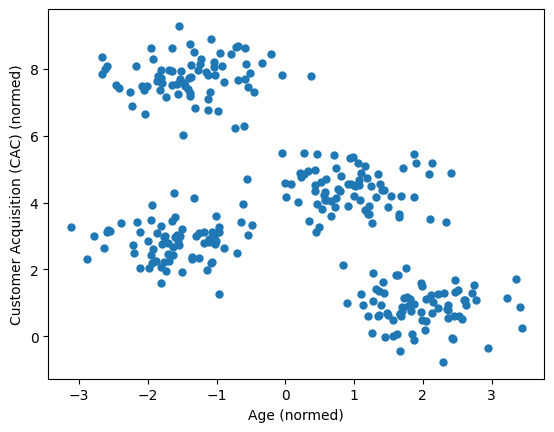

In [3]:
#Generated synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0) #y_true is the actual category
plt.scatter(X[:, 0], X[:, 1], s=25);
plt.xlabel("Age (normed)")
plt.ylabel("Customer Acquisition (CAC) (normed)")

In [6]:
#Perform the hierarchical clustering
hc_ward = linkage(X, method="ward", #minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach
                  metric="euclidean")
''' 
Below a simple example of what linkage returns.
It returns the hierarchical clustering encoded as a linkage matrix
#Column 1: The index of the first cluster (or point) being merged.
#Column 2: The index of the second cluster (or point) being merged.
#Column 3: The distance (or dissimilarity) between the two clusters being merged.
#Column 4: The number of original observations (data points) contained in the newly formed cluster after the merge.
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
Z = linkage(X, 'ward')
Z
# Abajo se ve manualmente. 
#Para entender los indeces de las dos primeras columnas del linkage matrix,
#piense que X va creciendo a medida que se añaden clusters
#Los nuevos elementos de X abajo son clusters. La cuarta columna es cuantos items van quedando
2,8,0,4,1,9,9,0, [9,9], [0, 0], [2, 1], [8, 9, 9], [0, 0, 2, 1], [4, 0, 0, 2, 1], [8, 9, 9, 4, 0, 0, 2, 1]
'''

In the dendrogram, the vertical lines represent clusters. The longer the vertical lines, the greater the dissimilarity between the merged clusters.


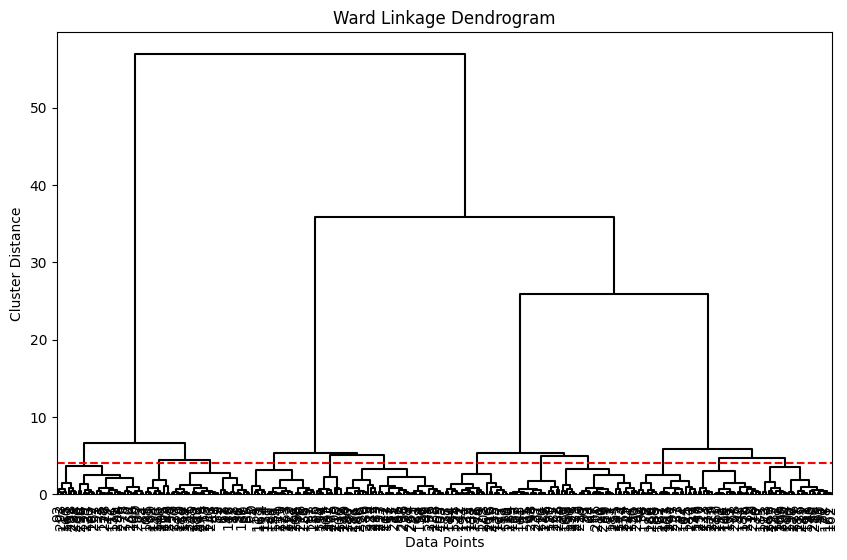

In [7]:
#Plot the dendrogram 
print("In the dendrogram, the vertical lines represent clusters. The longer the vertical lines, the greater the dissimilarity between the merged clusters.")
plt.figure(figsize=(10,6))
d_ward = dendrogram(hc_ward, leaf_rotation=90, leaf_font_size=10, link_color_func=lambda x: 'black')
plt.title('Ward Linkage Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Cluster Distance')

#Plot a horizontal line indicating the clustering point (see elbow point below)
plt.axhline(y=4, color='r', linestyle='--');

The elbow point, is the point where the distances between clusters (vertical lines in the dendogram) starts to be too small i.e. good number of clusters


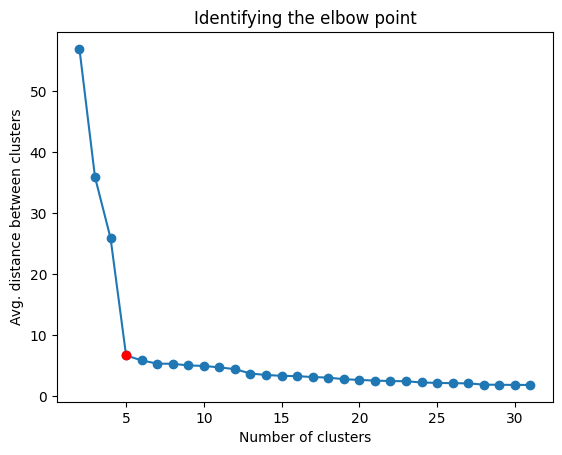

In [10]:
#Plot the elbow point. 
print("The elbow point, is the point where the distances between clusters (vertical lines in the dendogram) starts to be too small i.e. good number of clusters")
distances = hc_ward[-30:, 2]
num_clusters = np.arange(31, 1, -1)
plt.plot(num_clusters, distances, marker='o')
plt.plot(5, hc_ward[-4,2], color='red', marker='o')
plt.title('Identifying the elbow point')
plt.xlabel('Number of clusters')
plt.ylabel('Distance between clusters');

In [11]:
#Cut the dendrogram to form clusters
num_clusters = 4 #from the elbow above

#Cluster labels 
cluster_labels = cut_tree(hc_ward, n_clusters=num_clusters).flatten()
cluster_labels

array([0, 1, 2, 1, 0, 0, 3, 2, 1, 1, 3, 1, 2, 1, 0, 2, 2, 0, 3, 3, 0, 0,
       2, 3, 3, 2, 0, 2, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 0, 2, 3, 2, 2,
       3, 3, 1, 3, 1, 0, 3, 0, 1, 0, 0, 3, 1, 3, 1, 0, 1, 2, 1, 3, 3, 3,
       1, 0, 1, 3, 2, 3, 1, 3, 3, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 3, 3, 2, 0, 0, 2, 3, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2,
       3, 3, 0, 1, 0, 2, 1, 0, 0, 2, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 1, 3,
       3, 0, 1, 3, 3, 1, 2, 1, 1, 3, 2, 3, 2, 3, 1, 2, 1, 1, 1, 2, 1, 2,
       0, 3, 1, 3, 0, 2, 1, 2, 2, 0, 2, 3, 3, 2, 0, 2, 2, 1, 0, 2, 3, 1,
       0, 0, 2, 3, 0, 2, 3, 3, 2, 2, 2, 2, 0, 1, 2, 3, 2, 2, 3, 3, 3, 2,
       3, 1, 2, 3, 0, 3, 2, 1, 3, 1, 2, 1, 2, 3, 2, 2, 1, 3, 3, 0, 0, 2,
       1, 0, 0, 3, 0, 3, 2, 1, 1, 2, 2, 1, 2, 0, 3, 2, 0, 3, 1, 3, 0, 2,
       0, 1, 1, 1, 1, 3, 3, 1, 2, 3, 0, 2, 3, 3, 3, 0, 0, 1, 2, 2, 3, 0,
       1, 3, 2, 1, 2, 0, 0, 3, 3, 2, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0,
       1, 3, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 3], d

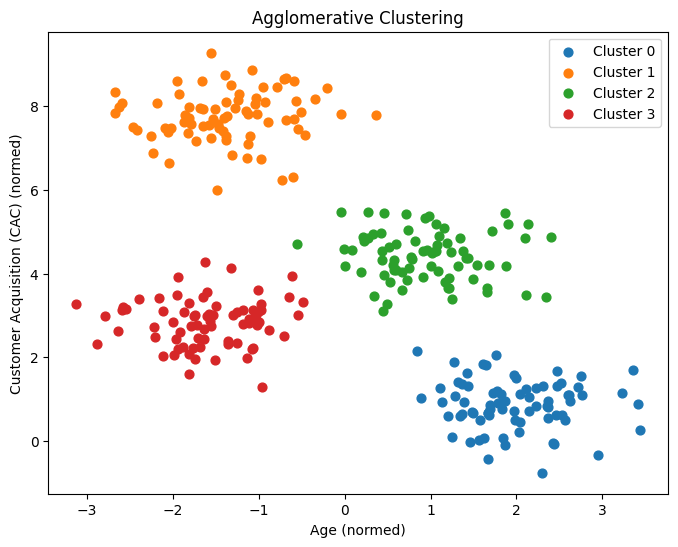

In [12]:
#  Scatter plot for the visualizing the clusters
plt.figure(figsize=(8, 6))
for cluster_label in np.unique(cluster_labels):
    cluster_indices = np.where(cluster_labels == cluster_label)
    plt.scatter(X[cluster_indices, 0], X[cluster_indices, 1], s=40, label=f'Cluster {cluster_label}')

#plt.yticks(np.arange(len(categories)), categories)
plt.title('Agglomerative Clustering')
plt.xlabel("Age (normed)")
plt.ylabel("Customer Acquisition (CAC) (normed)")
plt.legend()

In [13]:
#We now the actual labels. Let's calculate an external metric for validation. 
#Calculate NMI score (normalized mutual information...1 is perfect labeling)
nmi = normalized_mutual_info_score(y_true, cluster_labels)
nmi

1.0

Let's do hierarchical clustering on the bank data

In [26]:
db = data_bank.sample(5000, random_state = 0).reset_index(drop=True) #smaller subset for a pedagogical reason: for reducing computational times
X = np.array(db.loc[:, ["emp_var_rate", "cons_conf_idx"]]) #include as many variables you want
X.shape

(5000, 2)

In [27]:
#Perform the hierarchical clustering
hc_ward = linkage(X, method="ward", #minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach
                  metric="euclidean")

In [28]:
hc_ward.shape

(4999, 4)

In the dendrogram, the vertical lines represent clusters. The longer the vertical lines, the greater the dissimilarity between the merged clusters.


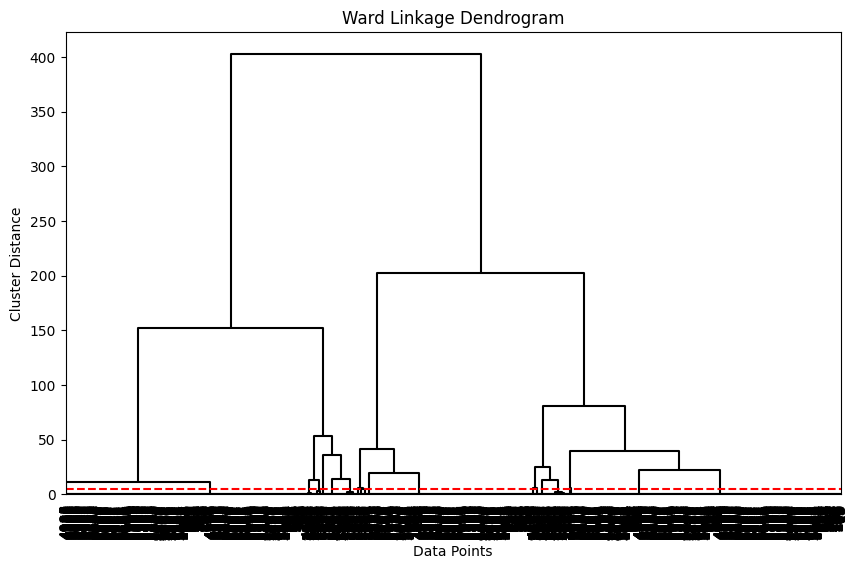

In [33]:
#Plot the dendrogram 
print("In the dendrogram, the vertical lines represent clusters. The longer the vertical lines, the greater the dissimilarity between the merged clusters.")
plt.figure(figsize=(10,6))
d_ward = dendrogram(hc_ward, leaf_rotation=90, leaf_font_size=10, link_color_func=lambda x: 'black')
plt.title('Ward Linkage Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Cluster Distance')

#Plot a horizontal line indicating the clustering point (see elbow point below)
plt.axhline(y=5, color='r', linestyle='--');

The elbow point, is the point where the distances between clusters (vertical lines in the dendogram) starts to be too small i.e. good number of clusters


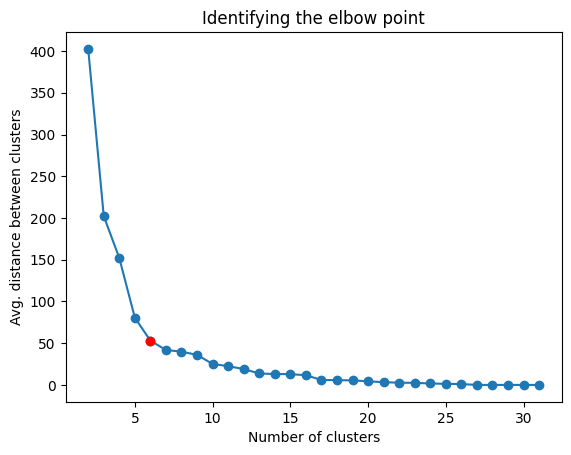

In [34]:
#Plot the elbow point. 
print("The elbow point, is the point where the distances between clusters (vertical lines in the dendogram) starts to be too small i.e. good number of clusters")
distances = hc_ward[-30:, 2]
num_clusters = np.arange(31, 1, -1)
plt.plot(num_clusters, distances, marker='o')
plt.plot(6, hc_ward[-5,2], color='red', marker='o')
plt.title('Identifying the elbow point')
plt.xlabel('Number of clusters')
plt.ylabel('Avg. distance between clusters');

# Exercise clustering: Case Scholastic Travel Company (STC)

1) Do a clustering procedure on the STC data set (STC_AB.csv). Use K means. You are free to select the clustering variables and how many, but justify the selection. Remember to clean the data if necessary.
2) Did you find any interesting clusters? Are there relevant for business? Can you assign descriptive names to the clusters?
3) Are the cluster valid according to the silhouette metric?

Note: the variable dictionary is in STC_A_UV7581-XLS-ENG.xlsx and STC_B_UV7583-XLS-ENG.xlsx. You can open them in excel if you prefer.

# Appendix

In [56]:
STC_A = pd.read_excel("STC_A_UV7581-XLS-ENG.xlsx", sheet_name = "Exhibit 1 -- Data")
STC_B = pd.read_excel("STC_B_UV7583-XLS-ENG.xlsx", sheet_name = "Exhibit 1 -- Data")

In [60]:
STC_AB = pd.merge(STC_A, STC_B, on='ID', how='inner')
STC_AB = STC_AB.dropna(subset=['ID'])
STC_AB.columns = STC_AB.columns.str.replace(".", "_", regex=False)
STC_AB.columns = STC_AB.columns.str.replace(" ", "_", regex=False)
[STC_AB.shape, STC_A.shape, STC_B.shape]


[(2389, 64), (2392, 56), (2392, 9)]

In [61]:
STC_AB.columns

Index(['ID', 'Program_Code', 'From_Grade', 'To_Grade', 'Group_State',
       'Is_Non_Annual_', 'Days', 'Travel_Type', 'Departure_Date',
       'Return_Date', 'Deposit_Date', 'Special_Pay', 'Tuition', 'FRP_Active',
       'FRP_Cancelled', 'FRP_Take_up_percent_', 'Early_RPL', 'Latest_RPL',
       'Cancelled_Pax', 'Total_Discount_Pax', 'Initial_System_Date',
       'Poverty_Code', 'Region', 'CRM_Segment', 'School_Type',
       'Parent_Meeting_Flag', 'MDR_Low_Grade', 'MDR_High_Grade',
       'Total_School_Enrollment', 'Income_Level', 'EZ_Pay_Take_Up_Rate',
       'School_Sponsor', 'SPR_Product_Type', 'SPR_New_Existing', 'FPP',
       'Total_Pax', 'SPR_Group_Revenue', 'NumberOfMeetingswithParents',
       'FirstMeeting', 'LastMeeting', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'SchoolGradeTypeLow',
       'SchoolGradeTypeHigh', 'SchoolGradeType', 'DepartureMonth',
       'GroupGradeTypeLow', 'GroupGradeTypeHigh', 'GroupGradeType',
       'MajorProgramCode', '

In [62]:
STC_AB.to_csv("STC_AB.csv")